In [112]:
# СОСНЮК КАТЕРИНА ФІТ 4-6 ВАРІАНТ 22
#1 Завантажте файл Housing.csv. Виведіть перші 5 рядків. 
import pandas as pd
import csv
xls_file = pd.ExcelFile('C:\Housing.xlsx')
df = xls_file.parse(xls_file.sheet_names[0])
df.to_csv('output.csv', index=False)
with open('output.csv', 'r') as file:
    csv_reader = csv.reader(file)
    data = list(csv_reader)
column_names = []
for row in data[0]:
    column_names.append(row.split(','))
column_names
data_rows = []
for row in data:
    if data.index(row)!=0:
        data_rows.append(row[0].split(','))
df = pd.DataFrame(data_rows, columns=column_names[0])
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [113]:
#2 Зробіть новий датасет, який містить тільки ці стовпчики. 
new_df = df.iloc[:, :4]
new_df

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


In [114]:
# 3 Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних. 
# Зробити це  по аналогії з попередніми роботами (визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити 
#тип даних на float, потім на середнє значення за стовпчиком. 

#перевірте наявність відсутніх значень
missing_values = new_df.isna().sum()
missing_values
#ЇХ НЕМАЄ


price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64

In [115]:
# перевірити наявність “-“
count = (new_df.applymap(lambda x: "-" in str(x))
            .sum()  
        )
count
#ЇХ НЕМАЄ

price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64

In [116]:
# визначити тип даних
new_df.dtypes

price        object
area         object
bedrooms     object
bathrooms    object
dtype: object

In [117]:
# змінити тип даних на float
new_df = new_df.astype(float)
new_df.dtypes


price        float64
area         float64
bedrooms     float64
bathrooms    float64
dtype: object

In [118]:
# 4 Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі та поліпшити її стабільність. 
# Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, а стандартне відхилення - близьким до 1. 
mean = new_df.mean()#середнє значення
std = new_df.std()#сандартне відхилення
new_df = (new_df - mean) / std
new_df

,price,area,bedrooms,bathrooms
0,4.562174,1.045766,1.402131,1.420507
1,4.000809,1.755397,1.402131,5.400847
2,4.000809,2.216196,0.047235,1.420507
3,3.982096,1.082630,1.402131,1.420507
4,3.551716,1.045766,1.402131,-0.569663
...,...,...,...,...
540,-1.575421,-0.990968,-1.307661,-0.569663
541,-1.603676,-1.267448,0.047235,-0.569663
542,-1.612845,-0.705273,-1.307661,-0.569663
543,-1.612845,-1.032440,0.047235,-0.569663


In [119]:
# 5 Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.
# 6 Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок). 
import pandas as pd
from sklearn.model_selection import train_test_split

y = new_df['price']
X = new_df[['area','bedrooms','bathrooms']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [120]:
# 7 Побудуйте модель лінійної регресії та навчіть її на навчальних даних. 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [121]:
# Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE) та коефіцієнт детермінації 
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Середньоквадратична помилка (RMSE): {rmse:.2f}")
r_squared = model.score(X_test, y_test)
print(f"Коефіцієнт детермінації: {r_squared:.2f}")

Середньоквадратична помилка (RMSE): 0.78
Коефіцієнт детермінації: 0.48


In [122]:
# Потім застосуйте  крос-валідацію для підвищення якості моделі. Порівняйте результати (без крос-валідації і з крос-валідацією).
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

#Функція для обчислення rmse
def rmse_scorer(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse
#Функція для обчислення коефіцієнту детермінації
def r2_scorer(y_true, y_pred):
    r_squared = r2_score(y_true, y_pred)
    return r_squared
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

model = LinearRegression()
cross_val_scores_rmse = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(rmse_scorer))
cross_val_scores_r2 = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(r2_scorer))
mean_cv_rmse = cross_val_scores_rmse.mean()
std_cv_rmse = cross_val_scores_rmse.std()

mean_cv_r2 = cross_val_scores_r2.mean()
std_cv_r2 = cross_val_scores_r2.std()

print(f"RMSE (без крос валідації): {rmse:.2f}")
print(f"Середнє RMSE (з крос валідацією): {mean_cv_rmse:.2f}")
print(f"Стандартне відхилення RMSE (з крос валідацією): {std_cv_rmse:.2f}")

print(f"Коефіцієнт детермінації(без крос валідації): {r_squared:.2f}")
print(f"Середній коефіцієнт детермінації (з крос валідацією): {mean_cv_r2:.2f}")
print(f"Стандартний коефіцієнт детермінації (з крос валідацією): {std_cv_r2:.2f}")

# Висновок: крос-валідація забезпечує надійнішу та надійнішу оцінку продуктивності моделі


RMSE (без крос валідації): 0.78
Середнє RMSE (з крос валідацією): 0.72
Стандартне відхилення RMSE (з крос валідацією): 0.10
Коефіцієнт детермінації(без крос валідації): 0.48
Середній коефіцієнт детермінації (з крос валідацією): 0.43
Стандартний коефіцієнт детермінації (з крос валідацією): 0.13


In [123]:
# 9 Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних. 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Прогнозовані ціни на будинки для тестового набору даних: {y_pred}")

Прогнозовані ціни на будинки для тестового набору даних: [ 8.79895814e-01  7.84761589e-01 -6.39973758e-01 -2.08691849e-01
 -4.32790304e-01  1.61932519e-01  5.49795230e-01  6.83809666e-01
 -8.12357185e-01 -7.04294202e-01  2.12761481e+00 -6.62814562e-01
 -7.08927128e-01 -6.18102489e-01 -4.30635512e-01  8.36570556e-01
 -1.07955150e+00  6.78743481e-03 -2.55344578e-02 -2.17634361e-01
 -2.04382263e-01  1.84557844e-01 -7.24226158e-01 -4.67266990e-01
  4.91615824e-01  1.53031991e+00 -8.44679077e-01  3.05840950e-02
  1.55823828e+00 -8.64072213e-01  2.46063379e-01 -6.13792903e-01
  6.77021947e-01  1.39307194e-01 -3.27528922e-02  3.75350949e-01
 -2.84971516e-01 -3.76442350e-01 -5.36220361e-01  2.09108803e-01
  4.33436417e-01 -7.28320264e-01  7.67523246e-01 -3.81075276e-01
 -5.60248980e-02 -2.42414479e-01  6.77021947e-01 -6.18425956e-02
  2.24098171e-01 -8.64072213e-01  9.94853891e-01 -8.64072213e-01
  1.63763972e-01 -3.16431491e-01 -2.77321880e-01 -6.59043553e-01
  6.23152126e-01 -7.68937987e-01 

In [108]:
import numpy as np

#Середні значення 
mean_X = np.mean(X)
mean_y = np.mean(y)

# Коефіцієнт 1
beta_1 = np.sum((X - mean_X) * (y - mean_y)) / np.sum((X - mean_X) ** 2)

# Коефіцієнт 0
beta_0 = mean_y - beta_1 * mean_X

C:\Users\S\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


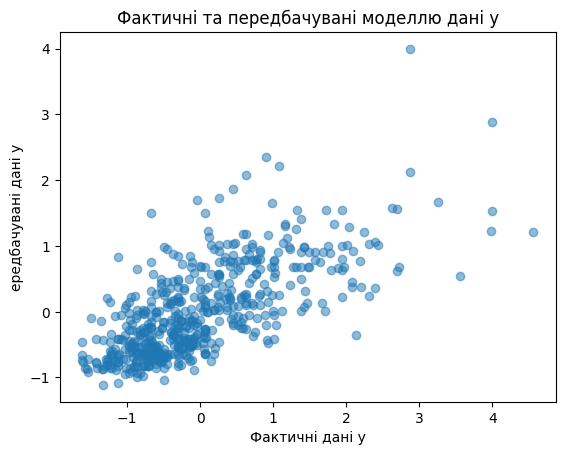

In [125]:
# Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю.
import matplotlib.pyplot as plt

plt.scatter(y, model.predict(X), alpha=0.5)
plt.xlabel("Фактичні дані y")
plt.ylabel("Передбачувані дані y")
plt.title("Фактичні та передбачувані моделлю дані y")
plt.show()

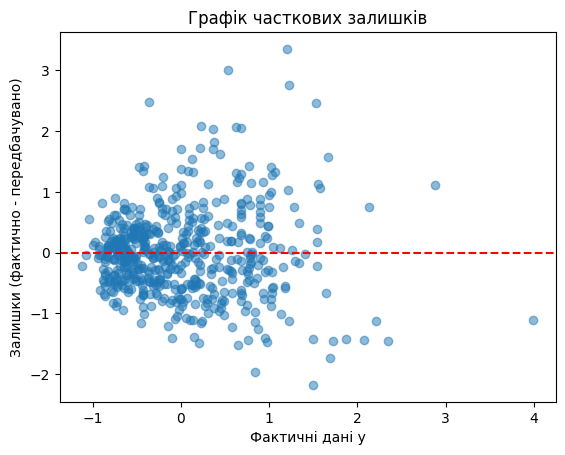

In [128]:
residuals = y - model.predict(X)
plt.scatter(model.predict(X), residuals, alpha=0.5)
plt.xlabel("Фактичні дані y")
plt.ylabel("Залишки (фактично - передбачувано)")
plt.title("Графік часткових залишків")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

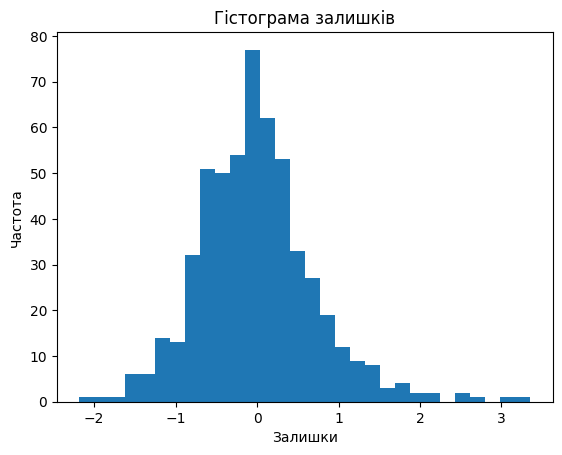

In [129]:
plt.hist(residuals, bins=30)
plt.xlabel("Залишки")
plt.ylabel("Частота")
plt.title("Гістограма залишків")
plt.show()

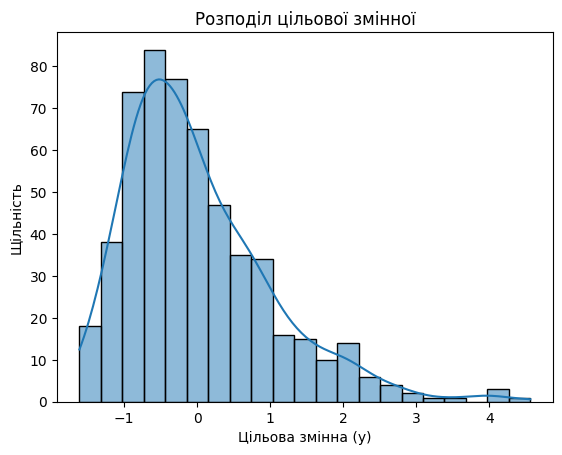

In [130]:
import seaborn as sns

sns.histplot(y, kde=True)
plt.xlabel("Цільова змінна (y)")
plt.ylabel("Щільність")
plt.title("Розподіл цільової змінної")
plt.show()

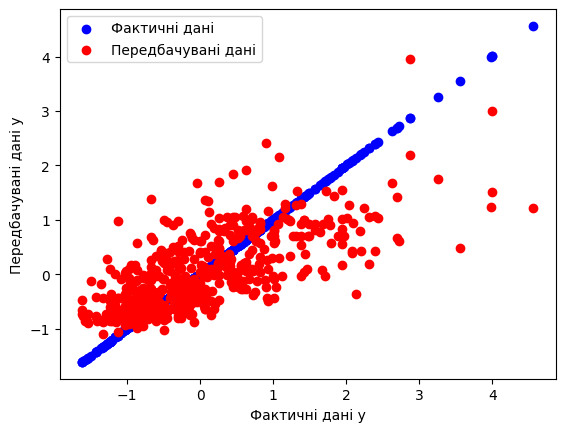

In [131]:
# Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони. 
import numpy as np
import matplotlib.pyplot as plt
#ОЦІНЮЄМО АНАЛІТИЧНІ РЕЗУЛЬТАТИ

X = np.column_stack((np.ones(X.shape[0]), X))

coefficients = np.linalg.lstsq(X, y, rcond=None)[0]

beta_0 = coefficients[0]
beta_1, beta_2, beta_3 = coefficients[1:]

y_pred = beta_0 + beta_1 * X[:, 1] + beta_2 * X[:, 2] + beta_3 * X[:, 3]

plt.scatter(y, y, label='Фактичні дані', color='blue')

plt.scatter(y, y_pred, label='Передбачувані дані', color='red')

plt.xlabel('Фактичні дані y')
plt.ylabel('Передбачувані дані y')
plt.legend()

plt.show()

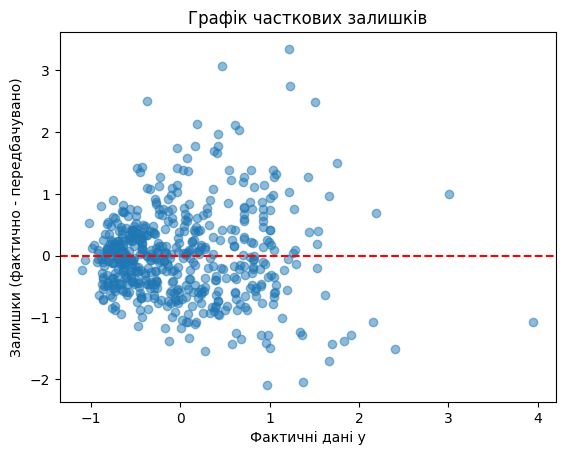

In [133]:
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Фактичні дані y")
plt.ylabel("Залишки (фактично - передбачувано)")
plt.title("Графік часткових залишків")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

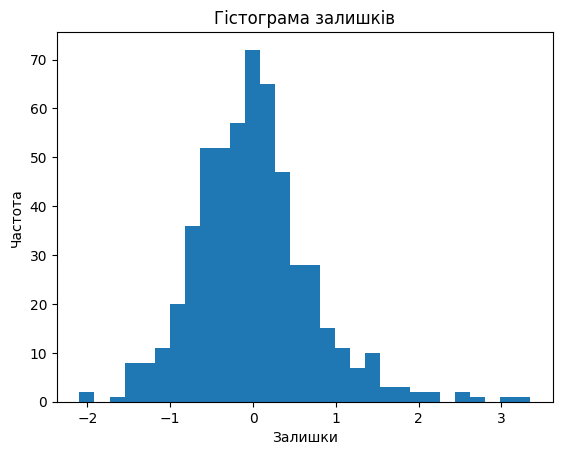

In [134]:
plt.hist(residuals, bins=30)
plt.xlabel("Залишки")
plt.ylabel("Частота")
plt.title("Гістограма залишків")
plt.show()


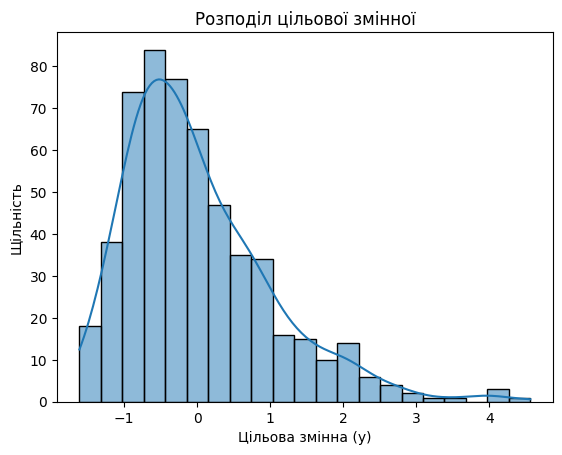

In [135]:
sns.histplot(y, kde=True)
plt.xlabel("Цільова змінна (y)")
plt.ylabel("Щільність")
plt.title("Розподіл цільової змінної")
plt.show()

In [ ]:
# Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів та порівняння з аналітичним рішенням. 
# Результати, отримані за допомогою лінійної регресії, схожі на отримані за допомогою аналітичного рішення. Звідси ефективність лінійної регресії 
# у прогнозуванні цін на будинок є високою.
